In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from dataloader import initAnndata

## Initilize anndata with SNARE-seq dataset

In [5]:
# read cDNA-seq data, initlize cDNA-seq anndata object
cDNA_adata = initAnndata(mtx_path='SNAREseq/cDNA/matrix.mtx',
                         features_path='SNAREseq/cDNA/genes.tsv', 
                         barcodes_path='SNAREseq/cDNA/barcodes.tsv')

# read ATAC-seq data, initilize ATAC-seq anndata obejct
# ATAC_adata = initAnndata(mtx_path='SNAREseq/ATAC/matrix.mtx',
#                          features_path='SNAREseq/ATAC/peaks.tsv', 
#                          barcodes_path='SNAREseq/ATAC/barcodes.tsv')

## Filter the dataset
For SNARE-seq dataset, cells with fewer than 200 peaks or genes, or peaks or genes with fewer than 10 cells were removed from further analysis

In [6]:
import warnings
warnings.filterwarnings("ignore")

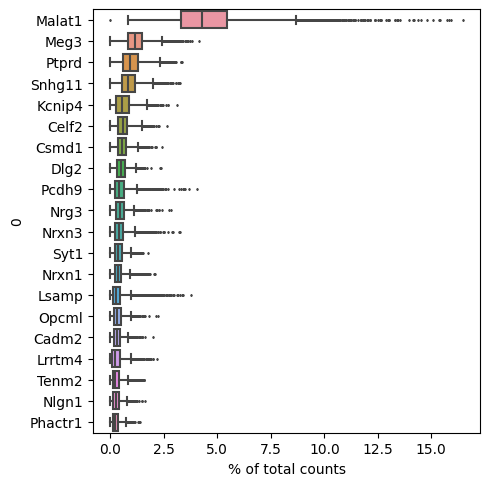

In [7]:
sc.pl.highest_expr_genes(cDNA_adata, n_top=20)

In [ ]:
sc.pl.highest_expr_genes(ATAC_adata, n_top=20)

In [ ]:
# filter cells with fewer than 200 genes
sc.pp.filter_cells(cDNA_adata, min_genes=200)
# filter genes with fewer than 10 cells
sc.pp.filter_genes(cDNA_adata, min_cells=10)
# filter cells with fewer than 200 peaks
sc.pp.filter_cells(ATAC_adata, min_genes=200)
# filter peaks with fewer than 10 cells
sc.pp.filter_genes(ATAC_adata, min_cells=10)

AnnData object with n_obs × n_vars = 10309 × 33160

## 2 Normalize

In [ ]:
cDNA_adata

In [ ]:
sc.pp.calculate_qc_metrics(cDNA_adata, percent_top=None, inplace=True)
cDNA_adata

In [ ]:
sns.displot(cDNA_adata.obs["total_counts"], bins=100, kde=False)

In [ ]:
scales_counts = sc.pp.normalize_total(cDNA_adata, target_sum=None, inplace=False)
# log1p transform
cDNA_adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)
cDNA_adata.layers["log1p_norm"]

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(cDNA_adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(cDNA_adata.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

In [ ]:
ATAC_adata

In [ ]:
sc.pp.calculate_qc_metrics(ATAC_adata, percent_top=None, inplace=True)
ATAC_adata

In [ ]:
sns.displot(ATAC_adata.obs["total_counts"], bins=100, kde=False)

In [ ]:
atac_scales_counts = sc.pp.normalize_total(ATAC_adata, target_sum=None, inplace=False)
# log1p transform
ATAC_adata.layers["log1p_norm"] = sc.pp.log1p(atac_scales_counts["X"], copy=True)
ATAC_adata.layers["log1p_norm"]

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(ATAC_adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(ATAC_adata.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

## 3 Feature selection

In [ ]:
sc.pp.highly_variable_genes(cDNA_adata, 
                            layer="log1p_norm",
                            n_top_genes=8000,
                            inplace=True)
cDNA_adata

In [ ]:
cDNA_adata.var['highly_variable'].value_counts()

In [ ]:
sc.pp.highly_variable_genes(ATAC_adata, 
                            layer="log1p_norm",
                            n_top_genes=23000,
                            inplace=True)
ATAC_adata

In [ ]:
ATAC_adata.var['highly_variable'].value_counts()